In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# creating a model class that inherits a module
# A bit of a oops concept we will use her to build the model

class Model(nn.Module):
    # Input layer (4 features of the flower) -->
    # Hidden Layer1 (number of neurons) -->
    # H2 (n) -->
    # output (3 classes of iris flowers)

    def __init__(self, in_features=4,h1=8,h2=9,out_features=3):
        super().__init__() # instantiate our nn.Module
        self.fc1 = nn.Linear(in_features,h1) 
        self.fc2 = nn.Linear(h1,h2) 
        self.out = nn.Linear(h2,out_features) 

    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)

        return x

In [3]:
# Pick a manual seed for randomization
torch.manual_seed(32)
# create an instance of model
model=Model()


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
df=pd.read_csv("/kaggle/input/iris/Iris.csv")

In [6]:
df.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [7]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
# preparing our dataset-converting string to float

df['Species'] = df['Species'].replace('Iris-setosa', 0.0)
df['Species'] = df['Species'].replace('Iris-versicolor', 1.0)
df['Species'] = df['Species'].replace('Iris-virginica', 2.0)

df

<ipython-input-8-7a5ff9d4cfab>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'] = df['Species'].replace('Iris-virginica', 2.0)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0.0
1,2,4.9,3.0,1.4,0.2,0.0
2,3,4.7,3.2,1.3,0.2,0.0
3,4,4.6,3.1,1.5,0.2,0.0
4,5,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2.0
146,147,6.3,2.5,5.0,1.9,2.0
147,148,6.5,3.0,5.2,2.0,2.0
148,149,6.2,3.4,5.4,2.3,2.0


In [9]:
# Train Test Split
X = df.drop(['Species','Id'], axis=1) # axis =1 means vertical axis or  deleting a column
y = df['Species'] 

In [10]:
print(X)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: Species, Length: 150, dtype: float64


In [11]:
# Convert these to numpy arrays
X=X.values
y=y.values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Train Test split 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=32)

In [14]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [15]:
# Convert Y features to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [16]:
# Set the criterion of model to measure the error and so on...

criterion = nn.CrossEntropyLoss()
#choose Adam optimmizer , lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), )
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [17]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [18]:
print(y_train.unique())  # Check unique class labels


tensor([0, 1, 2])


Epoch: 0 and loss: 1.169895887374878
Epoch: 10 and loss: 0.9578844308853149
Epoch: 20 and loss: 0.7988812923431396
Epoch: 30 and loss: 0.634953498840332
Epoch: 40 and loss: 0.44043001532554626
Epoch: 50 and loss: 0.291716992855072
Epoch: 60 and loss: 0.17829042673110962
Epoch: 70 and loss: 0.11587586998939514
Epoch: 80 and loss: 0.08928147703409195
Epoch: 90 and loss: 0.07743765413761139


Text(0.5, 0, 'Epoch')

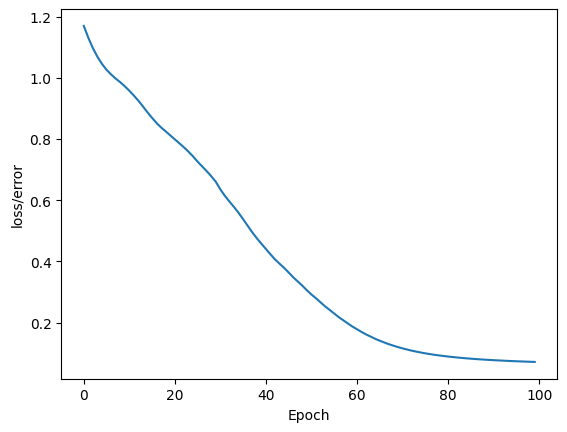

In [19]:
# train our model
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
    # Go forward and geta prediction
    y_pred = model.forward(X_train) # Get predicted results

    # Measure the loss/error , gonna be high at first
    loss = criterion(y_pred, y_train) # predicted values vs the y_train

    # Keep track of our losses
    losses.append(loss.detach().numpy())

    # print every 10 epcoh
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')

    # Do some back propagation: take the error rate of forward propagation and feed it back
    # thru the network of fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# **Plot the loss curve**
plt.plot(range(epochs), losses) 
plt.ylabel("loss/error") 
plt.xlabel('Epoch') 

In [20]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():
    y_eval = model.forward(X_test) # X_test are features from our test
    loss = criterion(y_eval, y_test) # Find the loss or error

In [21]:
loss

tensor(0.0539)

In [22]:
correct = 0
with torch.no_grad():
    for i , data in enumerate (X_test):
        y_val = model.forward(data)
        
        # Will tell us what type of flower class our network things it is
        print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct+=1

print(f'We got {correct} correct!')

1.)  tensor([-3.3580,  3.9452,  0.3616]) 	 1 	 1
2.)  tensor([  7.5862,   1.1113, -11.3861]) 	 0 	 0
3.)  tensor([  6.6288,   1.5092, -10.4603]) 	 0 	 0
4.)  tensor([-3.3304,  4.2647,  0.0569]) 	 1 	 1
5.)  tensor([-7.3705,  2.8135,  5.1481]) 	 2 	 2
6.)  tensor([-7.3749,  3.9061,  4.2781]) 	 2 	 2
7.)  tensor([  6.2304,   1.6527, -10.0543]) 	 0 	 0
8.)  tensor([  6.8783,   1.4056, -10.7016]) 	 0 	 0
9.)  tensor([-2.6728,  4.3138, -0.6444]) 	 1 	 1
10.)  tensor([  7.2201,   1.3890, -11.1494]) 	 0 	 0
11.)  tensor([-3.8269,  4.4110,  0.5165]) 	 1 	 1
12.)  tensor([-8.6886,  1.9990,  6.9012]) 	 2 	 2
13.)  tensor([-2.0605,  3.8275, -0.7672]) 	 1 	 1
14.)  tensor([-1.0676,  4.3809, -2.2975]) 	 1 	 1
15.)  tensor([-7.5000,  2.6230,  5.3318]) 	 2 	 2
16.)  tensor([-8.6214,  1.5491,  7.1280]) 	 2 	 2
17.)  tensor([-3.7724,  3.6503,  0.9422]) 	 1 	 1
18.)  tensor([-6.7624,  2.7791,  4.5289]) 	 2 	 2
19.)  tensor([-1.6978,  4.2047, -1.4772]) 	 1 	 1
20.)  tensor([  7.8104,   1.3824, -11.9435])

In [23]:
# Test on new data

new_iris = torch.tensor([3.2,3.1,1.2,0.2])

In [24]:
with torch.no_grad():
    print(model(new_iris))

tensor([ 5.9983,  0.8992, -9.0354])


In above - find out the maximum of three , it will be the first one which is 5.9983 , so this dataset have higher chance that it is setosa

In [26]:
new_iris = torch.tensor([3.2,3.1,5.2,3.2])

with torch.no_grad():
    print(model(new_iris))

tensor([-10.0014,  -0.2906,   9.4438])


In above it is iris virginica

In [27]:
# Save our NN Model
torch.save(model.state_dict(),'my_iris_model.pt')

In [29]:
#Load model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))


<ipython-input-29-0d0680cf6f25>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_iris_model.pt'))


<All keys matched successfully>

In [31]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)